In [3]:
import numpy as np
from matplotlib import pyplot as plt

import os

import skimage
from skimage import data, io
from skimage.color import rgb2gray

In [27]:
def svd(im, n=50):
    if len(im.shape) == 2:
        u, s, vh = np.linalg.svd(im)
        im_cmpr = u[:, :n]@np.diag(s[:n])@vh[:n, :]
    else:
        assert len(im.shape)==3 and im.shape[-1]==3
        u, s, vh = np.linalg.svd(im[:, :, 0])
        im_r = u[:, :n]@np.diag(s[:n])@vh[:n, :]

        u, s, vh = np.linalg.svd(im[:, :, 1])
        im_g = u[:, :n]@np.diag(s[:n])@vh[:n, :]

        u, s, vh = np.linalg.svd(im[:, :, 2])
        im_b = u[:, :n]@np.diag(s[:n])@vh[:n, :]

        im_cmpr = np.stack((im_r, im_g, im_b), axis=2)
        # im_cmpr = np.stack((normalize_one(im_r), normalize_one(im_g), normalize_one(im_b)), axis=2)*255
    im_cmpr = im_cmpr.astype(int)
    im_cmpr = np.clip(im_cmpr, 0, 255)
    return im_cmpr.astype(np.uint8)

In [5]:
im = io.imread('data/flowers/daisy/100080576_f52e8ee070_n.jpg')

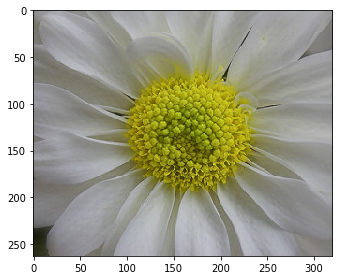

In [7]:
io.imshow(im)

In [17]:
im_svd = svd(im, 50)

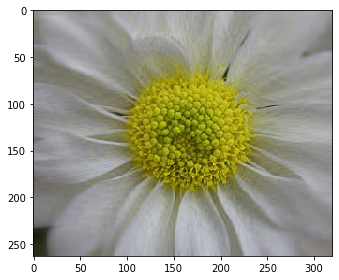

In [18]:
io.imshow(im_svd)

In [20]:
io.imsave('save.jpg', im_svd)

In [38]:
def batch_svd(file):
    assert file.endswith('.jpg')
    image = io.imread(file)
    image_svd = svd(image, 40)
    file_new = file.replace('flowers', 'flowers_svd40')
    io.imsave(file_new, image_svd)

In [39]:
from multiprocessing import Pool

In [1]:
with Pool(16) as p:
    print(p.map(batch_svd, files))

In [21]:
flowers = np.load('data/flowers.npy')

In [22]:
files = flowers[:, 0]

In [31]:
for i, file in enumerate(files):
    assert file.endswith('.jpg')
    image = io.imread(file)
    image_svd = svd(image, 50)
    file_new = file.replace('flowers', 'flowers_svd50')
    io.imsave(file_new, image_svd)
    if i%500==499:
        print(i+1, file_new)

500 data/flowers_svd50/daisy/4561871220_47f420ca59_m.jpg
1000 data/flowers_svd50/dandelion/17821459748_873101edd0_m.jpg
1500 data/flowers_svd50/dandelion/477316928_a70a31a704_m.jpg
2000 data/flowers_svd50/rose/17990320484_93bba345d2_m.jpg
2500 data/flowers_svd50/rose/7471890786_aaff777641_n.jpg
3000 data/flowers_svd50/sunflower/4414084638_03d2db38ae.jpg
3500 data/flowers_svd50/tulip/14069914457_6805909b1c_n.jpg
4000 data/flowers_svd50/tulip/497305666_b5d4348826_n.jpg


In [29]:
file

'data/flowers/daisy/10466558316_a7198b87e2.jpg'

In [30]:
file.replace('flowers', 'flowers_svd50')

'data/flowers_svd50/daisy/10466558316_a7198b87e2.jpg'

In [37]:
np.random.rand()

0.9276987045864867